# Fast Fourier Transform operation with pyclesperanto

This notebook display the usage of `fft` and `ifft` in pyclesperanto. As it is still a WIP, functions, parameters and usage may still change.

In [1]:
import pyclesperanto as cle
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.230.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Maximum Object Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Applying FFT and iFFT to an array

Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0


array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]],
      dtype=float32, mtype=buffer)
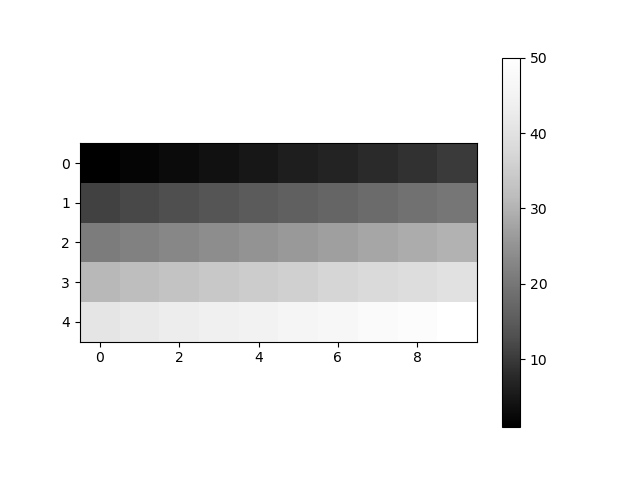
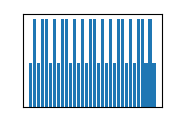

In [2]:
arr = cle.push(np.asarray( 
    [
        [
            [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10],
            [11,12,13,14,15,16,17,18,19,20],
            [21,22,23,24,25,26,27,28,29,30],
            [31,32,33,34,35,36,37,38,39,40],
            [41,42,43,44,45,46,47,48,49,50]
        ],
        [
            [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10],
            [11,12,13,14,15,16,17,18,19,20],
            [21,22,23,24,25,26,27,28,29,30],
            [31,32,33,34,35,36,37,38,39,40],
            [41,42,43,44,45,46,47,48,49,50]
        ]
    ]
).astype(np.float32))
arr

we call the `fft` operation which take a real array as input and will return the fft output as an Hermitian Complex buffer.

Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0


array([[[ 2.5500000e+03,  0.0000000e+00, -5.0000000e+01,  1.5388417e+02,
         -5.0000000e+01,  6.8819107e+01, -5.0000000e+01,  3.6327129e+01,
         -5.0000000e+01,  1.6245987e+01, -5.0000000e+01,  0.0000000e+00],
        [-5.0000000e+02,  6.8819098e+02, -4.3209559e-07,  2.6002335e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -3.4644248e-07,  1.3039468e-07,  0.0000000e+00,  0.0000000e+00],
        [-5.0000000e+02,  1.6245987e+02, -4.9165410e-06,  4.8424563e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -1.4675538e-06, -9.9071667e-07,  0.0000000e+00,  0.0000000e+00],
        [-5.0000000e+02, -1.6245987e+02,  6.8238896e-06, -1.0277590e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          1.4675538e-06,  1.9443910e-06,  0.0000000e+00,  0.0000000e+00],
        [-5.0000000e+02, -6.8819098e+02,  2.3394441e-06,  1.2144637e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          3.4644248e-07,  8.2327961e-07,  0.0000000e+00,  0.0000000e+00]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]],
      dtype=float32, mtype=buffer)
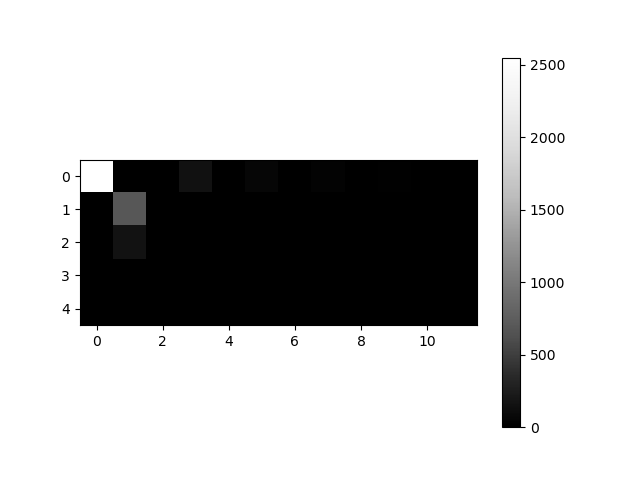
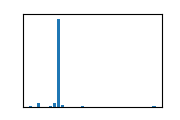

In [3]:
fft_arr = cle.__experimental__.vk_fft(arr, None)
fft_arr

We can transform back the complexe buffer into a real array using the `ifft` function. Here, because we do not have the precise dimension of the real buffer output, an empty output buffer must be provided to the function. In this example, it is the same size buffer provided to the `fft` at the start of this notebook.

Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0
Error: Fail to read binary file size. Reading size: 0


array([[[ 1.       ,  1.9999996,  3.0000002,  4.       ,  5.       ,
          6.       ,  7.       ,  8.       ,  9.       , 10.       ],
        [10.999999 , 11.999999 , 12.999999 , 13.999999 , 14.999999 ,
         15.999999 , 16.999998 , 17.999998 , 18.999998 , 19.999998 ],
        [21.       , 22.       , 23.       , 24.       , 25.       ,
         26.       , 27.       , 28.       , 29.       , 30.       ],
        [31.       , 32.       , 33.       , 34.       , 35.       ,
         36.       , 37.       , 38.       , 39.       , 40.       ],
        [41.       , 42.       , 43.       , 44.       , 45.       ,
         46.       , 47.       , 48.       , 49.       , 50.       ]],

       [[ 1.       ,  1.9999996,  3.0000002,  4.       ,  5.       ,
          6.       ,  7.       ,  8.       ,  9.       , 10.       ],
        [10.999999 , 11.999999 , 12.999999 , 13.999999 , 14.999999 ,
         15.999999 , 16.999998 , 17.999998 , 18.999998 , 19.999998 ],
        [21.       , 22.       , 23.       , 24.       , 25.       ,
         26.       , 27.       , 28.       , 29.       , 30.       ],
        [31.       , 32.       , 33.       , 34.       , 35.       ,
         36.       , 37.       , 38.       , 39.       , 40.       ],
        [41.       , 42.       , 43.       , 44.       , 45.       ,
         46.       , 47.       , 48.       , 49.       , 50.       ]]],
      dtype=float32, mtype=buffer)
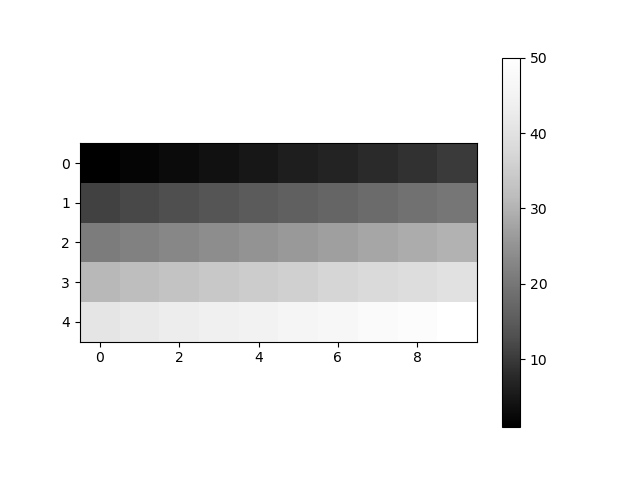
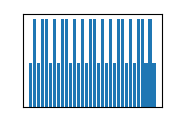

In [4]:
new_arr = cle.create_like(arr)
cle.__experimental__.vk_ifft(fft_arr, new_arr)
new_arr

We manage to retrieve the original array, with some approximation errors, possibly due to `single precision` approximation. 

Applying the same operation using numpy for verification with single and double precision. We can see with sinple precision that we also have some approximation (although less) which disapear using double precision.

In [5]:
np.fft.ifft2(np.fft.fft2(arr)).real  # single precision

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]],
      dtype=float32)

In [6]:
np.fft.ifft2(np.fft.fft2(arr.get().astype(float))).real  # double precision

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]])

## FFT on an image

array([[ 40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,  32.,  24.,
         24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152., 184., 208.,
        232., 232., 224.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160., 192., 216.,
        232., 232., 232.],
       [ 64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168., 200., 216.,
        224., 232., 232.],
       [ 40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,  24.,  24.,
         24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184., 208., 216.,
        224., 224., 224.],
       [ 16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  24.,  40.,  48.,  80., 112., 144., 176., 200., 216., 216.,
        216., 216., 216.],
       [ 24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  32.,  56.,  80., 112., 144., 176., 200., 208., 216., 216.,
        216., 216., 208.],
       [ 32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,  16.,  16.,
         32.,  40.,  80., 112., 144., 176., 200., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,  24.,  24.,
         48.,  64., 104., 144., 168., 192., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,  24.,  32.,
         64.,  88., 136., 176., 192., 200., 208., 216., 216., 208., 208.,
        200., 200., 192.],
       [ 48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,  40.,  48.,
         80., 112., 152., 184., 192., 200., 208., 216., 216., 216., 208.,
        208., 200., 200.],
       [ 48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  48.,  64.,
        104., 136., 160., 184., 192., 200., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,  64.,  88.,
        112., 144., 160., 176., 192., 200., 208., 216., 224., 224., 216.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  80., 104.,
        128., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  96., 120.,
        136., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72., 104., 128.,
        136., 144., 152., 160., 176., 192., 208., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 48.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,  96., 120.,
        136., 152., 168., 176., 192., 208., 216., 224., 224., 216., 216.,
        208., 200., 192.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  88., 112.,
        136., 152., 176., 192., 208., 216., 224., 224., 224., 216., 208.,
        200., 192., 184.],
       [ 80.,  56.,  40.,  32.,  24.,  32.,  32.,  48.,  64.,  88., 112.,
        144., 168., 184., 208., 216., 224., 232., 232., 224., 216., 208.,
        200., 192., 176.],
       [ 96.,  72.,  48.,  40.,  24.,  24.,  24.,  40.,  56.,  88., 112.,
        144., 176., 200., 216., 224., 232., 232., 232., 224., 216., 208.,
        192., 184., 168.],
       [120.,  96.,  64.,  48.,  32.,  32.,  24.,  48.,  64.,  96., 120.,
        152., 184., 208., 224., 232., 232., 232., 232., 224., 216., 208.,
        192., 176., 160.],
       [136., 112.,  80.,  56.,  32.,  32.,  24.,  48.,  64.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 152.],
       [152., 128.,  96.,  72.,  48.,  40.,  24.,  40.,  56.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 144.],
       [160., 136., 112.,  88.,  56.,  40.,  24.,  40.,  48.,  88., 120.,
        160., 192., 208., 216., 224., 232., 232., 232., 224., 216., 200.,
  
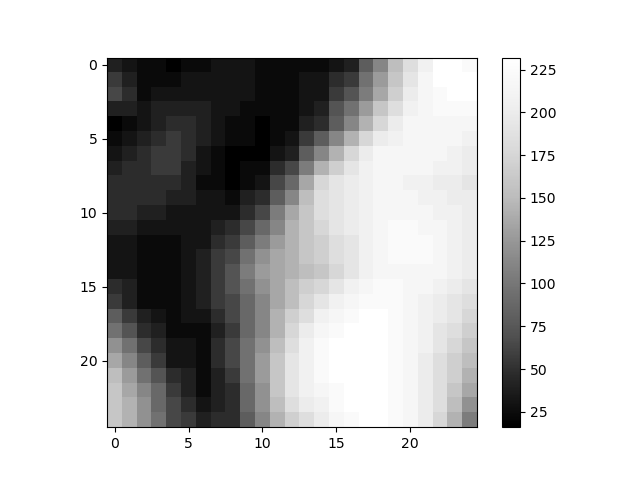
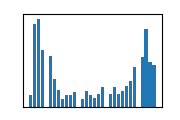

In [7]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:25])
image

array([[ 7.60480000e+04,  0.00000000e+00, -1.29348706e+03,
         2.93375352e+04, -8.78221313e+02,  5.14521289e+03,
        -1.93794055e+03,  3.02302734e+03, -1.23869116e+03,
         2.56508154e+03, -1.31883289e+03,  1.88128394e+03,
        -1.32391479e+03,  1.25985229e+03, -1.25388452e+03,
         1.03588013e+03, -1.31072974e+03,  7.99563232e+02,
        -1.39977576e+03,  4.81325226e+02, -1.26516711e+03,
         4.26673889e+02, -1.19580322e+03,  1.72609268e+02,
        -1.60755225e+03, -2.60290192e+02],
       [-3.05712988e+03,  6.94592920e+03,  3.77175952e+03,
        -6.64639746e+03,  1.03140747e+03,  2.69614111e+03,
         1.69738867e+03, -1.07301651e+02,  1.10272949e+03,
         8.70532990e+01,  1.04500854e+03,  1.59591675e+02,
         8.71522949e+02,  2.70214355e+02,  6.61044495e+02,
         2.26386353e+02,  5.83132080e+02,  4.37123901e+02,
         5.01329010e+02,  3.12424988e+02,  4.55927155e+02,
         5.31809692e+02,  5.11664246e+02,  5.35057861e+02,
         2.60004272e+02,  4.17825165e+02],
       [-1.56302991e+03,  4.55707129e+03,  1.35451309e+02,
        -3.41037842e+03,  2.69961987e+03,  3.71999976e+03,
         7.17761719e+02, -1.40166779e+01,  8.69444702e+02,
         5.29452393e+02,  4.77380066e+02,  2.19403915e+02,
         3.09488831e+02,  3.51132111e+02,  2.26143951e+02,
         4.16414093e+02,  2.19709274e+02,  3.79616699e+02,
         8.79397736e+01,  3.77512848e+02,  3.15426483e+01,
         4.27432312e+02, -4.50566902e+01,  5.05402344e+02,
        -5.54544983e+01,  2.93685669e+02],
       [-1.14972498e+03,  2.04195776e+03,  1.85234955e+02,
        -8.61049561e+02,  1.37481445e+03, -2.58160858e+02,
         5.97814331e+02,  6.78405273e+02,  1.78653198e+02,
        -2.55641876e+02,  2.16624268e+02,  1.70866379e+02,
         1.85815918e+02,  1.13687019e+01,  1.48117645e+02,
         1.67285065e+02,  1.13643402e+02,  1.70141846e+02,
         9.18584900e+01,  9.32530518e+01, -2.58205509e+01,
         9.85843277e+01,  9.34255981e+00,  1.68324585e+02,
         2.31110458e+01,  1.23628807e+02],
       [-9.77455139e+02,  1.34035999e+03,  1.13328247e+02,
        -7.84057495e+02,  5.38099915e+02,  4.55152710e+02,
         3.84958069e+02,  1.01717346e+02, -6.65839233e+01,
         1.31869308e+02,  1.44588043e+02,  9.31907349e+01,
        -4.56587982e+00,  5.14784698e+01,  9.00593491e+01,
         8.67026062e+01, -4.04692764e+01,  1.27811386e+02,
        -1.29219780e+01,  1.34333115e+02, -4.28319321e+01,
         1.31047485e+02, -6.12455025e+01,  1.23285156e+02,
        -7.17077026e+01,  5.93334808e+01],
       [-1.02144275e+03,  9.78684265e+02,  4.62332581e+02,
        -8.37723694e+02,  2.11490540e+02,  6.12128540e+02,
         2.86722229e+02,  2.37071136e+02,  1.77433365e+02,
         1.44446854e+02,  2.16656189e+01,  1.68758026e+02,
         1.94863815e+01,  7.28306046e+01, -5.18627892e+01,
         7.55868759e+01, -4.47855721e+01,  1.49851425e+02,
        -4.03393021e+01,  7.92736664e+01, -3.83343887e+01,
         1.08576492e+02, -7.62700958e+01,  1.09392525e+02,
        -8.52118988e+01,  7.27076187e+01],
       [-1.08890222e+03,  8.32305664e+02,  2.44463593e+02,
        -6.69356018e+02,  2.29903839e+02,  4.93946960e+02,
         7.43117218e+01,  3.24551514e+02,  1.51364700e+02,
         1.64044281e+02,  9.71209488e+01,  2.92954651e+02,
        -1.20639740e+02,  1.24193405e+02,  4.42659645e+01,
         1.56368591e+02, -4.96338959e+01,  1.23488968e+02,
        -2.17467728e+01,  9.45726624e+01, -1.15945206e+01,
         1.57521973e+02, -2.63083649e+01,  4.40421906e+01,
        -7.00940704e+01,  3.85007401e+01],
       [-1.00560870e+03,  7.50423889e+02,  4.43907135e+02,
        -3.83557983e+02,  2.21534332e+02,  5.67309875e+02,
         1.04533722e+02,  2.46907532e+02, -4.44742813e+01,
         1.72440094e+02,  2.65390320e+01,  1.86456024e+02,
        -1.71188965e+01,  1.01707947e+02, -7.46441498e+01,
         1.18770035e+02, -4.56127777e+01,  8.78772812e+01,
         1.86076412e+01,  1.08849594e+02,
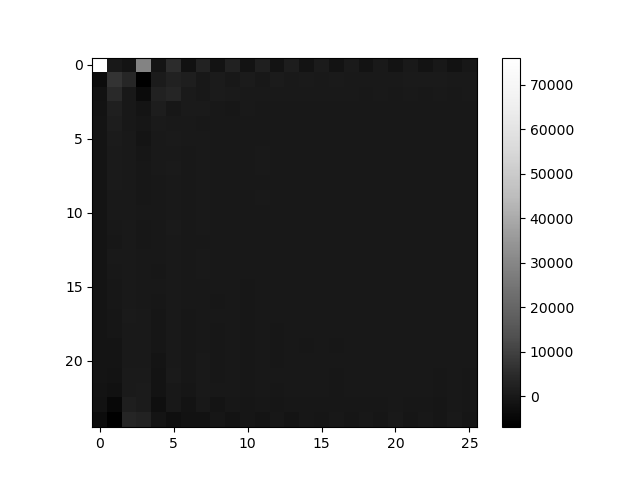
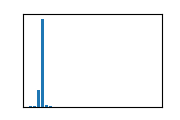

In [8]:
fft_image = cle.__experimental__.vk_fft(image, None)
fft_image

array([[ 40.00001 ,  32.000015,  24.000011,  24.000015,  16.000015,
         24.      ,  24.000023,  32.000015,  31.99997 ,  32.000008,
         24.000004,  24.000013,  24.000025,  23.999985,  24.00005 ,
         31.999989,  40.000015,  79.99999 , 112.000015, 151.99997 ,
        184.      , 207.99997 , 231.99995 , 232.      , 223.99994 ],
       [ 56.000008,  40.000008,  24.000008,  24.000023,  24.00003 ,
         32.000008,  32.      ,  32.000015,  32.00003 ,  32.00004 ,
         24.000004,  24.000038,  24.000034,  32.000076,  32.00001 ,
         48.00002 ,  56.000015,  95.999985, 127.999985, 159.99997 ,
        192.      , 215.99997 , 231.99998 , 231.99994 , 231.99997 ],
       [ 63.999985,  48.000023,  24.000008,  32.      ,  32.000008,
         31.999992,  32.      ,  32.000015,  32.      ,  31.999992,
         24.00002 ,  24.000021,  24.00003 ,  32.00001 ,  32.000046,
         56.00001 ,  72.00001 , 103.999985, 135.99998 , 167.99998 ,
        199.99997 , 215.99997 , 223.99995 , 231.99997 , 231.99997 ],
       [ 39.999985,  39.999992,  31.999992,  39.99999 ,  40.00002 ,
         40.      ,  39.999977,  32.000023,  32.00003 ,  24.00003 ,
         24.00001 ,  24.000034,  24.000046,  32.000088,  40.000008,
         72.00001 ,  96.      , 127.999985, 159.99997 , 183.99997 ,
        207.99998 , 215.99997 , 223.99994 , 223.99991 , 223.99995 ],
       [ 16.000023,  24.000038,  32.000008,  40.000023,  47.999992,
         48.      ,  40.000008,  31.999977,  23.99997 ,  24.000015,
         16.000004,  24.000011,  24.000042,  40.      ,  48.00007 ,
         80.000015, 111.999985, 144.00002 , 176.00002 , 200.      ,
        216.      , 215.99997 , 215.99997 , 216.00002 , 215.99995 ],
       [ 24.000004,  32.      ,  40.000008,  48.      ,  56.      ,
         47.999985,  39.999992,  32.000015,  24.000015,  24.00003 ,
         15.999989,  24.000027,  32.000015,  56.000046,  80.      ,
        112.      , 143.99998 , 175.99997 , 199.99995 , 207.99997 ,
        216.00002 , 215.99997 , 215.99998 , 215.99995 , 207.99998 ],
       [ 31.999996,  40.000023,  48.      ,  56.      ,  56.      ,
         48.000015,  32.000015,  24.000015,  16.      ,  16.000023,
         16.000015,  32.000015,  40.00004 ,  80.      , 112.00003 ,
        143.99998 , 175.99995 , 199.99997 , 215.99997 , 215.99997 ,
        215.99998 , 215.99997 , 215.99997 , 208.      , 199.99997 ],
       [ 40.      ,  47.999996,  47.99999 ,  56.00001 ,  56.000023,
         40.000008,  32.000008,  24.00003 ,  16.000069,  24.00003 ,
         24.000023,  48.000023,  64.00003 , 104.00003 , 144.      ,
        167.99997 , 191.99997 , 207.99994 , 215.99994 , 215.99997 ,
        215.99997 , 216.      , 207.99995 , 207.99994 , 199.99998 ],
       [ 48.000004,  47.999996,  47.99999 ,  47.99997 ,  48.      ,
         39.999992,  24.000015,  24.00003 ,  16.      ,  24.000046,
         32.000023,  64.00001 ,  88.000015, 136.      , 175.99997 ,
        192.      , 199.99997 , 207.99995 , 216.      , 215.99994 ,
        208.      , 207.99997 , 199.99995 , 199.99998 , 191.99994 ],
       [ 48.00001 ,  48.000004,  48.000034,  48.00003 ,  40.00003 ,
         39.999985,  32.      ,  32.000015,  24.000046,  40.000008,
         48.      ,  80.00003 , 112.00001 , 152.00002 , 183.99997 ,
        191.99998 , 199.99997 , 207.99997 , 215.99995 , 215.99997 ,
        215.99998 , 207.99997 , 207.99998 , 199.99994 , 200.      ],
       [ 47.999985,  48.000023,  40.000015,  40.      ,  32.00004 ,
         32.000008,  32.000015,  32.000023,  32.      ,  48.000015,
         64.000015, 104.000015, 136.      , 160.00002 , 183.99998 ,
        191.99998 , 199.99998 , 207.99997 , 216.00002 , 215.99998 ,
        215.99997 , 215.99998 , 207.99997 , 207.99998 , 199.99997 ],
       [ 40.000015,  40.00002 ,  32.000046,  32.00006 ,  32.000053,
         32.00004 ,  32.000023,  40.00006 ,  48.000084,  64.00004 ,
         88.000015, 112.000015, 143.99998 , 159.99998 , 175.99997 ,
        191.99995 , 199.99995 , 207.99995 , 2
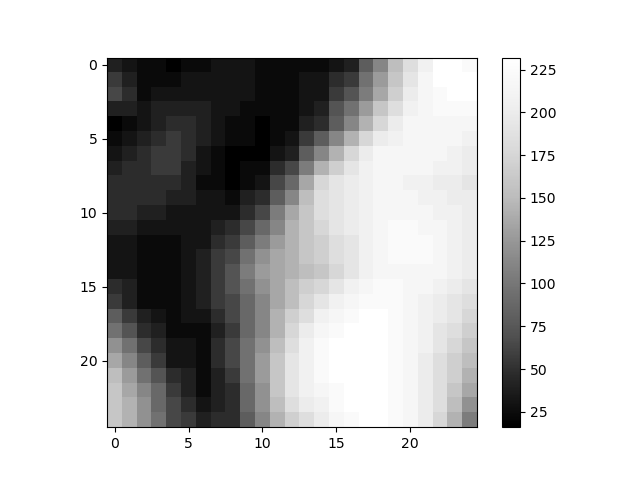
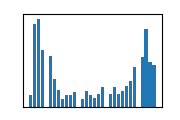

In [9]:
new_image = cle.create_like(image)
cle.__experimental__.vk_ifft(fft_image, new_image)
new_image

## Issue with specific input shape

Currently experimenting some issue related to the shape of the input. The FFT for a crop of shape (25,25) is good, same for a (25, 22), but fail if shape is (25,23) or (23,25)

array([[ 40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,  32.,  24.,
         24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152., 184., 208.,
        232.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160., 192., 216.,
        232.],
       [ 64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168., 200., 216.,
        224.],
       [ 40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,  24.,  24.,
         24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184., 208., 216.,
        224.],
       [ 16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  24.,  40.,  48.,  80., 112., 144., 176., 200., 216., 216.,
        216.],
       [ 24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  32.,  56.,  80., 112., 144., 176., 200., 208., 216., 216.,
        216.],
       [ 32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,  16.,  16.,
         32.,  40.,  80., 112., 144., 176., 200., 216., 216., 216., 216.,
        216.],
       [ 40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,  24.,  24.,
         48.,  64., 104., 144., 168., 192., 208., 216., 216., 216., 216.,
        208.],
       [ 48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,  24.,  32.,
         64.,  88., 136., 176., 192., 200., 208., 216., 216., 208., 208.,
        200.],
       [ 48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,  40.,  48.,
         80., 112., 152., 184., 192., 200., 208., 216., 216., 216., 208.,
        208.],
       [ 48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  48.,  64.,
        104., 136., 160., 184., 192., 200., 208., 216., 216., 216., 216.,
        208.],
       [ 40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,  64.,  88.,
        112., 144., 160., 176., 192., 200., 208., 216., 224., 224., 216.,
        216.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  80., 104.,
        128., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  96., 120.,
        136., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72., 104., 128.,
        136., 144., 152., 160., 176., 192., 208., 216., 216., 216., 216.,
        216.],
       [ 48.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,  96., 120.,
        136., 152., 168., 176., 192., 208., 216., 224., 224., 216., 216.,
        208.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  88., 112.,
        136., 152., 176., 192., 208., 216., 224., 224., 224., 216., 208.,
        200.],
       [ 80.,  56.,  40.,  32.,  24.,  32.,  32.,  48.,  64.,  88., 112.,
        144., 168., 184., 208., 216., 224., 232., 232., 224., 216., 208.,
        200.],
       [ 96.,  72.,  48.,  40.,  24.,  24.,  24.,  40.,  56.,  88., 112.,
        144., 176., 200., 216., 224., 232., 232., 232., 224., 216., 208.,
        192.],
       [120.,  96.,  64.,  48.,  32.,  32.,  24.,  48.,  64.,  96., 120.,
        152., 184., 208., 224., 232., 232., 232., 232., 224., 216., 208.,
        192.],
       [136., 112.,  80.,  56.,  32.,  32.,  24.,  48.,  64.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184.],
       [152., 128.,  96.,  72.,  48.,  40.,  24.,  40.,  56.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184.],
       [160., 136., 112.,  88.,  56.,  40.,  24.,  40.,  48.,  88., 120.,
        160., 192., 208., 216., 224., 232., 232., 232., 224., 216., 200.,
        184.],
       [160., 144., 120.,  88.,  64.,  48.,  32.,  40.,  48.,  88., 120.,
        152., 184., 200., 208., 224., 232., 232., 232., 224., 216., 200.,
        184.],
       [160., 144., 120.,  96.,  64.,  56.,  40.,  48.,  48.,  80., 112.,
        144., 
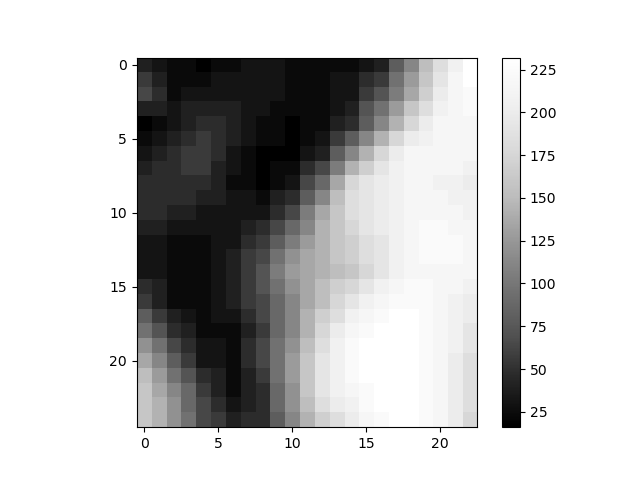
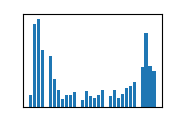

In [10]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:23])
image

array([[ 6.64400000e+04,  0.00000000e+00,  2.54650977e+03,
         2.61717988e+04, -8.74836548e+02,  5.74891699e+03,
        -2.06074902e+03,  3.85241333e+03, -1.46915698e+03,
         2.65430737e+03, -1.41903101e+03,  1.98322473e+03,
        -1.59390259e+03,  1.50682471e+03, -1.59569556e+03,
         1.06000903e+03, -1.57120239e+03,  6.90509644e+02,
        -1.58150171e+03,  6.17348267e+02, -1.50461743e+03,
         2.90608765e+02, -1.85581201e+03, -2.47354523e+02],
       [-2.88923584e+03,  7.57290234e+03,  1.63505444e+03,
        -6.20189209e+03,  1.97944788e+03,  2.27410205e+03,
         1.28016675e+03,  5.01348419e+01,  8.89935242e+02,
         2.53012299e+02,  7.35320801e+02,  1.87731598e+02,
         6.66137085e+02,  1.79213623e+02,  4.36362183e+02,
         3.11538025e+02,  5.07203705e+02,  2.77941223e+02,
         3.32953430e+02,  4.53171814e+02,  4.11357056e+02,
         4.66488861e+02,  2.11071991e+02,  3.09116272e+02],
       [-1.72315906e+03,  5.07577539e+03, -1.47990808e+03,
        -2.65953296e+03,  3.28854126e+03,  2.27743359e+03,
         4.30382690e+02,  4.51948151e+02,  7.09416260e+02,
         3.31623230e+02,  2.57930389e+02,  2.88134857e+02,
         1.57532104e+02,  3.43977478e+02,  1.53407486e+02,
         3.69106323e+02,  4.74106865e+01,  3.00416870e+02,
        -2.42379570e+01,  3.46647156e+02, -9.41672974e+01,
         3.90466248e+02, -4.67132416e+01,  2.10101624e+02],
       [-1.18171326e+03,  2.35527319e+03, -3.05298889e+02,
        -3.75510651e+02,  7.07151184e+02, -5.85258667e+02,
         8.71212952e+02,  2.76258881e+02, -1.71166840e+01,
         6.01784134e+00,  1.99547226e+02,  9.34273605e+01,
         5.22917175e+00,  7.65702438e+01,  5.13844070e+01,
         7.28735428e+01,  8.48932648e+01,  3.83849678e+01,
        -1.69033813e+01,  8.88662338e+00, -6.27554321e+00,
         1.07001144e+02,  2.11016731e+01,  6.44327316e+01],
       [-1.04893787e+03,  1.56757495e+03, -3.10333862e+02,
        -5.23615234e+02,  4.17852112e+02,  2.76465942e+02,
         2.44103882e+02, -5.38632507e+01,  1.97734070e+00,
         2.36932053e+02,  3.67088242e+01,  4.52519073e+01,
        -4.44233780e+01,  1.44207947e+02, -9.71467133e+01,
         3.31602859e+01, -6.64998169e+01,  9.24686661e+01,
        -7.85095444e+01,  7.08835831e+01, -8.28007202e+01,
         6.24489059e+01, -7.98236237e+01,  7.16510010e+00],
       [-1.10602637e+03,  1.15795691e+03, -2.02377319e-01,
        -7.48843384e+02,  2.20193604e+02,  4.66947876e+02,
         1.85819000e+02,  1.35876480e+02,  8.70495300e+01,
         3.25718956e+01,  7.03700104e+01,  1.01660400e+02,
        -1.86622925e+01,  4.96693344e+01, -7.78081207e+01,
         1.04064255e+02, -1.43966484e+01,  7.37982025e+01,
        -5.02719193e+01,  9.53152008e+01, -7.63834686e+01,
         7.66912079e+01, -7.14530869e+01,  4.83432579e+01],
       [-1.16447119e+03,  9.85643433e+02, -1.57311737e+02,
        -5.67376099e+02,  1.72510330e+02,  3.15579651e+02,
         5.87309418e+01,  2.86489044e+02, -1.42266922e+01,
         8.63959961e+01,  1.21062576e+02,  4.03241501e+01,
        -1.04586792e+01,  2.14455856e+02, -1.25210800e+01,
         7.55477829e+01, -2.45094299e-02,  1.04868988e+02,
        -3.93019333e+01,  1.35255402e+02, -2.57058716e+00,
         2.60448837e+01, -5.45285263e+01,  1.90538063e+01],
       [-1.12230139e+03,  8.33508667e+02,  8.29371643e+01,
        -4.13592712e+02,  2.38564728e+02,  3.56215149e+02,
         9.44415588e+01,  1.47454010e+02, -3.28998260e+01,
         1.81179077e+02,  2.72012978e+01,  1.07473976e+02,
        -4.28150406e+01,  7.24977417e+01, -2.15496216e+01,
         1.08367722e+02, -2.56294746e+01,  1.34374786e+02,
        -5.99109840e+01,  4.61137009e+01, -4.97650299e+01,
         3.50480423e+01, -8.82706146e+01,  6.20602570e+01],
       [-9.61051941e+02,  5.92412354e+02,  7.49849243e+01,
        -3.04573395e+02,  1.88279785e+02,  3.02668030e+02,
         8.58407898e+01,  2.39937820e+02, -1.47472534e+01,
         8.28699265e+01, -3.91058960e+0
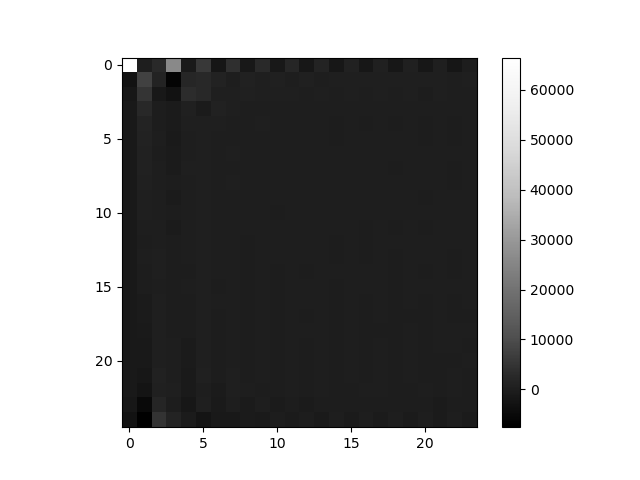
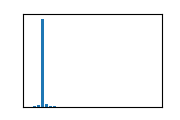

In [11]:
fft_image = cle.__experimental__.vk_fft(image, None)
fft_image

array([[ 40.000008 ,  31.999998 ,  23.999994 ,  23.999998 ,  16.000006 ,
         23.99999  ,  23.999994 ,  31.999987 ,  32.000008 ,  32.000008 ,
         23.999987 ,  23.99999  ,  24.000004 ,  24.000006 ,  24.000011 ,
         31.999979 ,  40.000023 ,  79.99999  , 112.       , 151.99995  ,
        183.99998  , 208.       , 231.99998  ],
       [ 56.000008 ,  40.000008 ,  24.000011 ,  24.       ,  24.000011 ,
         31.999987 ,  32.000004 ,  32.00002  ,  32.000015 ,  32.       ,
         23.99999  ,  23.999985 ,  24.000017 ,  31.999992 ,  32.000034 ,
         47.999996 ,  55.99998  ,  95.99998  , 128.       , 159.99998  ,
        192.       , 215.99998  , 231.99997  ],
       [ 64.00001  ,  48.000008 ,  24.000006 ,  32.       ,  32.000008 ,
         31.999964 ,  32.000004 ,  32.000008 ,  32.000008 ,  32.000004 ,
         24.       ,  23.999985 ,  24.000006 ,  31.999998 ,  32.       ,
         55.99999  ,  72.       , 103.99999  , 136.       , 167.99998  ,
        200.00003  , 215.99998  , 223.99998  ],
       [ 40.000008 ,  40.       ,  31.999996 ,  40.000008 ,  40.00001  ,
         40.00001  ,  40.000015 ,  32.000015 ,  32.000042 ,  24.000011 ,
         24.000006 ,  24.       ,  24.000021 ,  32.000023 ,  40.000034 ,
         72.000015 ,  96.       , 128.00002  , 160.00003  , 184.       ,
        208.       , 216.       , 223.99998  ],
       [ 16.000006 ,  24.000006 ,  32.00001  ,  40.000023 ,  48.000023 ,
         48.00001  ,  40.000042 ,  32.000027 ,  24.000017 ,  24.000006 ,
         16.000017 ,  23.999985 ,  24.000017 ,  40.000015 ,  48.       ,
         80.       , 111.99999  , 143.99998  , 175.99998  , 199.99998  ,
        215.99998  , 215.99998  , 215.99998  ],
       [ 24.000017 ,  31.999996 ,  39.99999  ,  48.00001  ,  56.000008 ,
         48.       ,  40.       ,  32.00001  ,  24.000011 ,  24.       ,
         15.9999895,  23.999964 ,  31.999985 ,  56.       ,  80.       ,
        111.99996  , 143.99997  , 176.       , 200.       , 207.99995  ,
        215.99998  , 216.       , 215.99995  ],
       [ 32.000023 ,  40.       ,  47.999996 ,  56.       ,  56.000023 ,
         47.99998  ,  32.000008 ,  23.999985 ,  15.999995 ,  15.9999895,
         16.000006 ,  31.999996 ,  39.99999  ,  80.00001  , 112.000015 ,
        144.00002  , 176.       , 200.       , 216.00003  , 216.       ,
        216.       , 216.       , 216.       ],
       [ 40.000023 ,  48.000015 ,  48.000027 ,  56.00001  ,  56.00001  ,
         40.       ,  32.000008 ,  24.000006 ,  16.000021 ,  24.       ,
         23.999994 ,  47.99999  ,  64.00002  , 104.00002  , 144.       ,
        167.99998  , 192.       , 208.       , 216.       , 216.       ,
        216.       , 216.       , 207.99995  ],
       [ 48.000023 ,  47.999996 ,  48.000008 ,  47.99999  ,  48.       ,
         39.99999  ,  24.000017 ,  24.000011 ,  16.000011 ,  24.       ,
         32.       ,  63.999992 ,  88.00001  , 136.00002  , 176.00002  ,
        192.00003  , 200.       , 207.99998  , 216.       , 216.       ,
        208.       , 208.       , 199.99998  ],
       [ 48.       ,  47.999996 ,  48.000015 ,  48.000027 ,  40.00004  ,
         40.000015 ,  32.000015 ,  32.00001  ,  24.000042 ,  40.       ,
         47.99998  ,  79.999985 , 112.       , 152.00002  , 184.00003  ,
        192.       , 200.       , 208.       , 216.       , 215.99995  ,
        215.99995  , 207.99998  , 207.99995  ],
       [ 48.00001  ,  48.       ,  39.99999  ,  39.999996 ,  32.000008 ,
         31.999958 ,  31.99999  ,  31.999979 ,  32.       ,  47.99998  ,
         64.       , 103.99998  , 136.       , 159.99998  , 184.       ,
        191.99998  , 200.       , 207.99998  , 216.       , 215.99998  ,
        216.       , 216.       , 207.99995  ],
       [ 40.000023 ,  40.       ,  31.999996 ,  32.000008 ,  32.000015 ,
         31.999973 ,  31.999996 ,  39.99998  ,  48.000008 ,  63.99997  ,
         87.99997  , 111.99999  , 143.99998  , 160.00003  , 176.00003  ,
        192.       , 200.00003  , 208.   
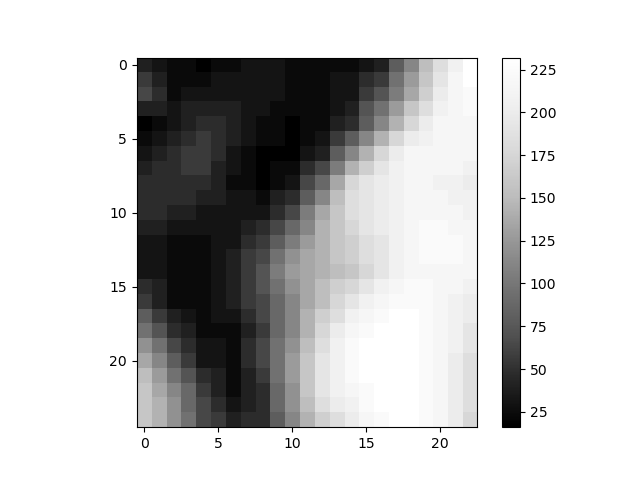
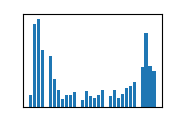

In [12]:
new_image = cle.create_like(image)
cle.__experimental__.vk_ifft(fft_image, new_image)
new_image